# Homework 1
Anoop Nath (nux9aq)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.preprocessing import StandardScaler
from scipy.stats import beta

## Q1

### Expected Days

|           |     Path    | Total Days  |    Probability    |    P* Days   |
|:---------:|:-----------:|:-----------:|:-----------------:|:------------:|
|   Path 1  | A -> B -> C |      8      | (1/3)*(1/2) = 1/6 |      4/3     |
|   Path 2  | B -> A -> C |      8      | (1/3)*(1/2) = 1/6 |      4/3     |
|   Path 3  |     A->C    |      5      | (1/3)*(1/2) = 1/6 |      5/6     |
|   Path 4  |     B->C    |      4      | (1/3)*(1/2) = 1/6 |      2/3     |
|   Path 5  |      C      |      1      |        1/3        |      1/3     |
| **Total** |             |             |       **1**       | **27/6=4.5** |

**The expected number of days to obtain a success is 4.5 Days**

### Variance of Expected Days

The variance of expected days can be calculated using the following formula:

Var(X)= E[$X^{2}$] - $(E[X]) ^{2}$



|           |     Path    | Total Days Squared |    Probability    |     P* Days    |
|:---------:|:-----------:|:------------------:|:-----------------:|:--------------:|
|   Path 1  | A -> B -> C |         64         | (1/3)*(1/2) = 1/6 |      64/6      |
|   Path 2  | B -> A -> C |         64         | (1/3)*(1/2) = 1/6 |      64/6      |
|   Path 3  |     A->C    |         25         | (1/3)*(1/2) = 1/6 |      25/6      |
|   Path 4  |     B->C    |         16         | (1/3)*(1/2) = 1/6 |      16/6      |
|   Path 5  |      C      |          1         |        1/3        |       1/3      |
| **Total** |             |                    |       **1**       | **171/6=28.5** |

In [2]:
28.5-4.5**2

8.25

**The expected number of days to obtain a success is 4.5 Days with a variance of 8.25 Days**

## Q2

## Q3

For a gaussian distribution with unknown mean M and known variance $\sigma^{2}$:

- Prior for M is N( $\mu _{0}$, $\sigma _{0}^{2}$)
- Var[M|x,$\sigma ^{2}$] =  $\frac{    \sigma _{0}^{2}    \sigma^{2} }{\sigma ^{2}+N  \sigma _{0}^{2}  }$

In [3]:
prior_var = 10
known_var = 5

We're told that the 95% confident interval for M has unit length 1. This means that:

(1.96)(2)($\sigma _{x}$)=1   

$\sigma _{x}$= $\frac{ 1}{3.92}$



In [4]:
st_dev = 1/3.92
st_dev

0.25510204081632654

We can now solve for N in the following formula:

Var[M|x,$\sigma ^{2}$] =  $\frac{    \sigma _{0}^{2}    \sigma^{2} }{\sigma ^{2}+N  \sigma _{0}^{2}  }$

$\sigma ^{2}+N  \sigma _{0}^{2}$ =  $\frac{    \sigma _{0}^{2}    \sigma^{2} }{Var[M|x,\sigma ^{2}] }$

N $\sigma _{0}^{2}$ =  $\frac{    \sigma _{0}^{2}    \sigma^{2} }{Var[M|x,\sigma ^{2}] }$ -$\sigma ^{2}$

N = $\frac{    \sigma _{0}^{2}    \sigma^{2} }{Var[M|x,\sigma ^{2}]\sigma _{0}^{2} }$ -$\frac{\sigma ^{2}}{\sigma _{0}^{2}}$

N = $\frac{  10*5 }{0.2551^{2}*10}$- $\frac{5}{10}$

In [5]:
(50/(st_dev**2*10))-0.5

76.33200000000001

We would need a sample size of 76.332 or 77 if rounded up to have a 0.95 probability that M lies in the interval

## Q4

In [6]:
df = pd.read_csv('/Users/anoopnath/Desktop/MSDS/DS6040/HW1/ArtHistBooks.csv')

df['Art'] = 0
df.loc[df.ArtBooks >=1, 'Art'] = 1 # making art column binary

#priors
alpha_flat= 1 #equal prob alpha
beta_flat = 1 #equal prob beta

alpha_low = 5 #low prob alpha
beta_low = 50 #low prob beta

### Part 1

Plot the distributions for the the following:

- p(hist)  <- probability of a history book being purchased   
- p(art)  <- probability of an art book being purchased   
- p(table)  <- probability of coffee table book being purchased   


In [7]:
k_hist= sum(df.HistoryBooks) #number of history book purchases
k_art = sum(df.Art)
k_table = sum(df.TableBooks)
n = len(df) #number of rows
x = np.linspace(0, 1, 1002)[1:-1] #x axix for plots

In [8]:
def createPlot(alpha_values, beta_values, typeOfBook):
    #function for plotting beta functions given a list of alphas and betas
    for a, b in zip(alpha_values, beta_values):
        dist = scipy.stats.beta(a, b)

        plt.plot(x, dist.pdf(x), 
                 label=r'$\alpha=%.0f,\ \beta=%.0f$' % (a, b))

    plt.xlabel('P(' +typeOfBook+')')
    #plt.ylabel(r'$p(x|\alpha,\beta)$')
    plt.ylabel('density')
    plt.title('Probability Density Function for ' +typeOfBook.title())    
    plt.legend([f'Prior--no info (a={alpha_values[0]}, b={beta_values[0]})',
                f'posterior|no info prior (a={alpha_values[1]}, b={beta_values[1]})',
                f'prior--low prob (a={alpha_values[2]}, b={beta_values[2]})',
                f'posterior|low prob prior (a={alpha_values[3]}, b={beta_values[3]})', ],
                bbox_to_anchor =(1.75, 0.95)
              )
    
    plt.show()

#### p(hist)

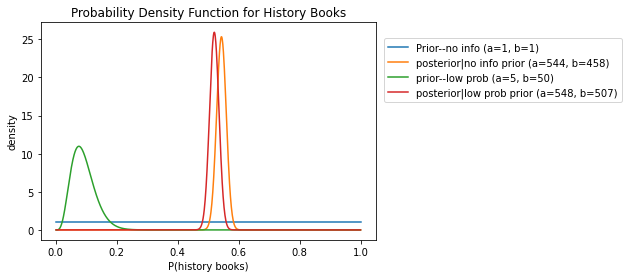

In [9]:

alpha_values_hist = [alpha_flat, alpha_flat+k_hist, alpha_low, alpha_low+k_hist ]
beta_values_hist = [beta_flat, beta_flat+n-k_hist,  beta_low, beta_low+n-k_hist ]
createPlot(alpha_values_hist, beta_values_hist, 'history books')

#### p(art)

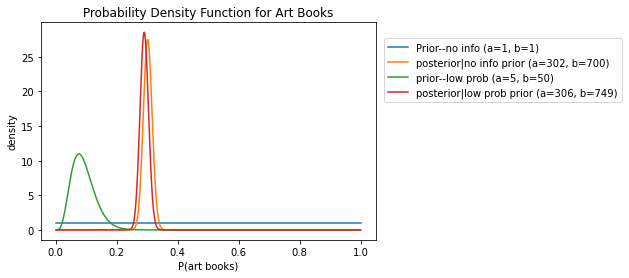

In [10]:
alpha_values_art = [alpha_flat, alpha_flat+k_art, alpha_low, alpha_low+k_art ]
beta_values_art = [beta_flat, beta_flat+n-k_art,  beta_low, beta_low+n-k_art ]
createPlot(alpha_values_art, beta_values_art, 'art books')

#### p(table)

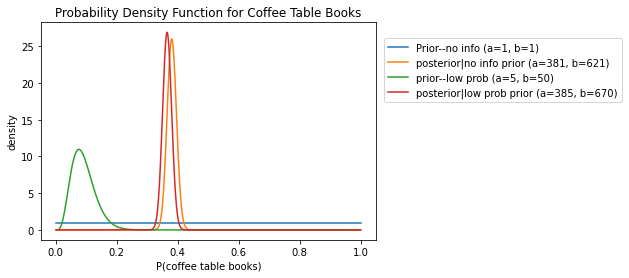

In [11]:
alpha_values_table = [alpha_flat, alpha_flat+k_table, alpha_low, alpha_low+k_table ]
beta_values_table = [beta_flat, beta_flat+n-k_table,  beta_low, beta_low+n-k_table ]
createPlot(alpha_values_table, beta_values_table, 'coffee table books')

## Part 2
Plot the distrubtions for the following conditional statements 
- p(new|art) <- probability of buying the new book given past purchase of art book
- p(new|hist)
- p(new|table)
- p(new|art & hist)
- p(new|art & table)
- p(new|table & hist)
- p(new|art & hist & table)

#### p(new|art)

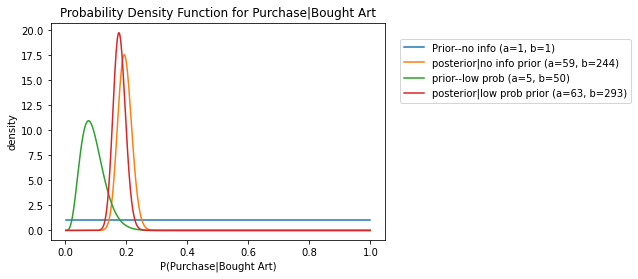

In [12]:
df_art= df.query("Art>0")
k_purchase_art= sum(df_art.Purchase)
n_purchase_art = len(df_art)

alpha_values_purchase_art = [alpha_flat, alpha_flat+k_purchase_art, alpha_low, alpha_low+k_purchase_art ]
beta_values_purchase_art = [beta_flat, beta_flat+n_purchase_art-k_purchase_art,  beta_low, beta_low+n_purchase_art-k_purchase_art ]
createPlot(alpha_values_purchase_art, beta_values_purchase_art, 'Purchase|Bought Art')

#### p(new|hist)

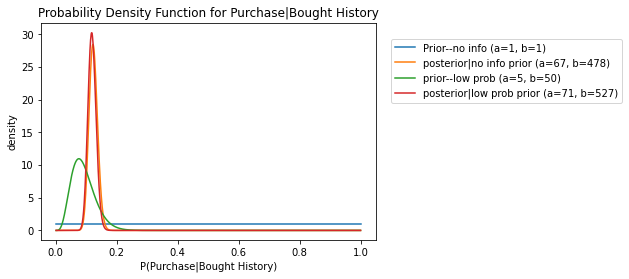

In [13]:
df_hist = df.query("HistoryBooks>0")
k_purchase_hist= sum(df_hist.Purchase)
n_purchase_hist = len(df_hist)

alpha_values_purchase_hist = [alpha_flat, alpha_flat+k_purchase_hist, alpha_low, alpha_low+k_purchase_hist ]
beta_values_purchase_hist = [beta_flat, beta_flat+n_purchase_hist-k_purchase_hist,  beta_low, beta_low+n_purchase_hist-k_purchase_hist ]
createPlot(alpha_values_purchase_hist, beta_values_purchase_hist, 'Purchase|Bought History')

#### p(new|table)

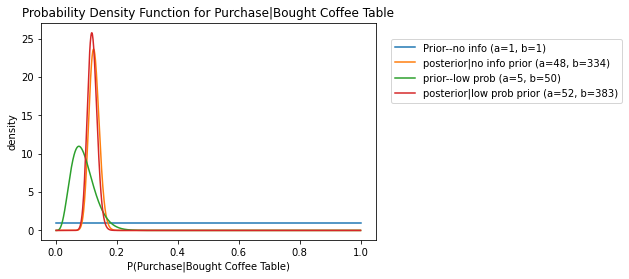

In [14]:
df_table = df.query("TableBooks>0")
k_purchase_table= sum(df_table.Purchase)
n_purchase_table = len(df_table)

alpha_values_purchase_table = [alpha_flat, alpha_flat+k_purchase_table, alpha_low, alpha_low+k_purchase_table ]
beta_values_purchase_table = [beta_flat, beta_flat+n_purchase_table-k_purchase_table,  beta_low, beta_low+n_purchase_table-k_purchase_table ]
createPlot(alpha_values_purchase_table, beta_values_purchase_table, 'Purchase|Bought Coffee Table')

#### p(new|art & hist)

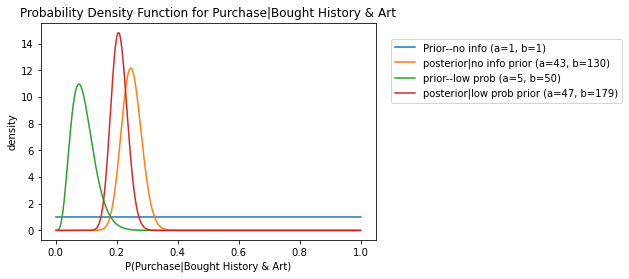

In [15]:
df_art_hist = df.query("Art>0").query("HistoryBooks>0")
k_purchase_art_hist= sum(df_art_hist.Purchase)
n_purchase_art_hist = len(df_art_hist)

alpha_values_purchase_art_hist = [alpha_flat, alpha_flat+k_purchase_art_hist, alpha_low, alpha_low+k_purchase_art_hist ]
beta_values_purchase_art_hist = [beta_flat, beta_flat+n_purchase_art_hist-k_purchase_art_hist,
                                 beta_low, beta_low+n_purchase_art_hist-k_purchase_art_hist ]
createPlot(alpha_values_purchase_art_hist, beta_values_purchase_art_hist, 'Purchase|Bought History & Art')

#### p(new|art & table)

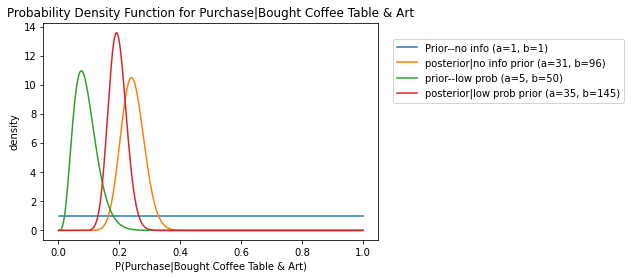

In [16]:
df_art_table = df.query("Art>0").query("TableBooks>0")
k_purchase_art_table= sum(df_art_table.Purchase)
n_purchase_art_table = len(df_art_table)

alpha_values_purchase_art_table = [alpha_flat, alpha_flat+k_purchase_art_table, alpha_low, alpha_low+k_purchase_art_table ]
beta_values_purchase_art_table = [beta_flat, beta_flat+n_purchase_art_table-k_purchase_art_table,
                                 beta_low, beta_low+n_purchase_art_table-k_purchase_art_table ]
createPlot(alpha_values_purchase_art_table, beta_values_purchase_art_table, 'Purchase|Bought Coffee Table & Art')

#### p(new|table & hist)

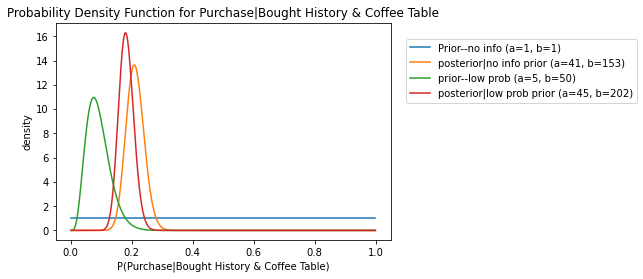

In [17]:
df_hist_table = df.query("HistoryBooks>0").query("TableBooks>0")
k_purchase_hist_table= sum(df_hist_table.Purchase)
n_purchase_hist_table = len(df_hist_table)

alpha_values_purchase_hist_table = [alpha_flat, alpha_flat+k_purchase_hist_table, alpha_low, alpha_low+k_purchase_hist_table ]
beta_values_purchase_hist_table = [beta_flat, beta_flat+n_purchase_hist_table-k_purchase_hist_table,
                                 beta_low, beta_low+n_purchase_hist_table-k_purchase_hist_table ]
createPlot(alpha_values_purchase_hist_table, beta_values_purchase_hist_table, 'Purchase|Bought History & Coffee Table')

#### p(new|art & hist & table)

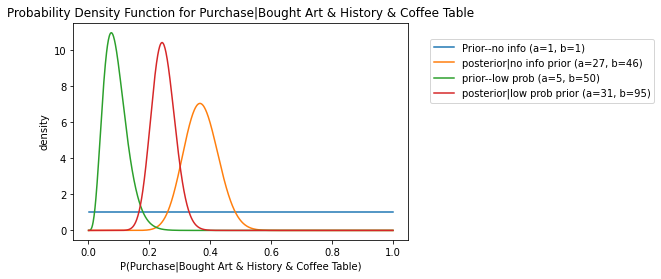

In [18]:
df_art_hist_table = df.query("HistoryBooks>0").query("TableBooks>0").query("Art>0")
k_purchase_art_hist_table= sum(df_art_hist_table.Purchase)
n_purchase_art_hist_table = len(df_art_hist_table)

alpha_values_purchase_art_hist_table = [alpha_flat, alpha_flat+k_purchase_art_hist_table, alpha_low, alpha_low+k_purchase_art_hist_table ]
beta_values_purchase_art_hist_table = [beta_flat, beta_flat+n_purchase_art_hist_table-k_purchase_art_hist_table,
                                 beta_low, beta_low+n_purchase_art_hist_table-k_purchase_art_hist_table ]
createPlot(alpha_values_purchase_art_hist_table, beta_values_purchase_art_hist_table, 'Purchase|Bought Art & History & Coffee Table')

## Q5

In [4]:
df = pd.read_csv('/Users/anoopnath/Desktop/MSDS/DS6040/HW1/CHDdata.csv')
df = df.drop('famhist', axis=1) #removing cateogorical variable

Now I'll scale all the variables except for chd

In [5]:
std_scaler = StandardScaler() 
df_scaled = std_scaler.fit_transform(df.to_numpy()) #scaling data
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df.columns.values
df_scaled.chd= df.chd

Now I'll create seperate dataframes for patients with CHD and without CHD

In [6]:
chd = df_scaled.query("chd > 0")
noChd = df_scaled.query("chd < 1")
Nchd = len(chd)
NnoChd = len(noChd)

Compute priors

In [8]:
predictors = len(df_scaled.columns)-1 #8
Lambda0 = np.identity(predictors) # chosen hyperparameter
mu0 = np.zeros(predictors)  # chosen hyperparameter
Lambda = np.identity(predictors)# assumed known

Next I'll calculate the posterior for CHD patients

In [9]:
xbar_chd = chd.mean().values[:-1]
posterior_mean_chd = xbar_chd@(Nchd*Lambda) @ np.linalg.inv(Lambda0 + Nchd*Lambda ) + mu0@Lambda0@ np.linalg.inv(Lambda0 + Nchd*Lambda )
posterior_precision_chd = Lambda0 + Nchd*Lambda 
posterior_covariance_matrix_chd = np.linalg.inv(posterior_precision_chd)

And now the posterior for non CHD patients

In [10]:
#calculate posterior for no chd
xbar_noChd = noChd.mean().values[:-1]
# "getting" the posterior is simply invoking the formula
posterior_mean_noChd = xbar_noChd@(NnoChd*Lambda) @ np.linalg.inv(Lambda0 + NnoChd*Lambda ) + mu0@Lambda0@ np.linalg.inv(Lambda0 + NnoChd*Lambda )
posterior_precision_noChd = Lambda0 + NnoChd*Lambda 
posterior_covariance_matrix_noChd = np.linalg.inv(posterior_precision_noChd)

In [11]:
print("bayesian mean estimate (CHD): ", posterior_mean_chd)
print("frequentist mean estimate (CHD)", xbar_chd)

bayesian mean estimate (CHD):  [0.26262681 0.4092133  0.35915368 0.34695952 0.14084173 0.13666279
 0.085375   0.50923163]
frequentist mean estimate (CHD) [0.26426823 0.41177089 0.36139839 0.34912802 0.14172199 0.13751694
 0.0859086  0.51241433]


In [12]:
print("bayesian mean estimate (No CHD): ", posterior_mean_noChd)
print("frequentist mean estimate (No CHD)", xbar_noChd)

bayesian mean estimate (No CHD):  [-0.13954758 -0.21743677 -0.19083744 -0.18435803 -0.0748367  -0.0726162
 -0.04536428 -0.27058182]
frequentist mean estimate (No CHD) [-0.14000966 -0.21815676 -0.19146935 -0.18496849 -0.0750845  -0.07285666
 -0.04551449 -0.27147779]


In [28]:
posterior_chd = pd.DataFrame({'Variable': chd.columns[:-1],
                              'Posterior Mean':posterior_mean_chd, 
                              'Frequentist Mean Estimate': xbar_chd,
                             })
posterior_chd

,Variable,Posterior Mean,Frequentist Mean Estimate
0,sbp,0.262627,0.264268
1,tobacco,0.409213,0.411771
2,ldl,0.359154,0.361398
3,adiposity,0.346960,0.349128
4,typea,0.140842,0.141722
5,obesity,0.136663,0.137517
6,alcohol,0.085375,0.085909
7,age,0.509232,0.512414


In [29]:
posterior_noChd = pd.DataFrame({'Variable': noChd.columns[:-1],
                              'Posterior Mean':posterior_mean_noChd, 
                              'Frequentist Mean Estimate': xbar_noChd,
                             })
posterior_noChd 

,Variable,Posterior Mean,Frequentist Mean Estimate
0,sbp,-0.139548,-0.140010
1,tobacco,-0.217437,-0.218157
2,ldl,-0.190837,-0.191469
3,adiposity,-0.184358,-0.184968
4,typea,-0.074837,-0.075085
5,obesity,-0.072616,-0.072857
6,alcohol,-0.045364,-0.045514
7,age,-0.270582,-0.271478


## Q6

## Q7